<a href="https://colab.research.google.com/github/siddpatel1/DSPS_SPatel/blob/main/HW8/SidPatel_HW8_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import json
import os
import pylab as pl
%pylab inline
from pprint import pprint
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
!pip install kaggle

In [ ]:
!rm -r higgsHW8SP

In [ ]:
!mkdir /content/drive/MyDrive/higgsHW8SP

In [ ]:
envs = json.load(open(".kaggle/kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs["username"]
os.environ["KAGGLE_KEY"] = envs["key"]

In [ ]:
cd higgsHW8SP

/content/drive/MyDrive/higgsHW8SP


In [ ]:
ls

In [ ]:
#accept rules, late submission button, verify phone on Kaggle 
!kaggle competitions download -c higgs-boson

  0% 0.00/2.58M [00:00<?, ?B/s]
100% 2.58M/2.58M [00:00<00:00, 76.3MB/s]
 63% 22.0M/34.8M [00:00<00:00, 93.4MB/s]
100% 34.8M/34.8M [00:00<00:00, 115MB/s] 
  0% 0.00/3.15k [00:00<?, ?B/s]
100% 3.15k/3.15k [00:00<00:00, 813kB/s]
 53% 9.00M/16.9M [00:00<00:00, 92.0MB/s]
100% 16.9M/16.9M [00:00<00:00, 107MB/s] 


In [ ]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  test.zip
random_submission.zip                    training.zip


- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS/blob/master/lab9/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set. 
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [ ]:
higgsdata = pd.read_csv("training.zip",compression='zip')

In [ ]:
higgsdata.shape

(250000, 33)

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,1.437609,-0.128305,-708.985189,38.707419,-0.010973,-0.008171,46.660207,-0.019507,0.043543,41.717235,-0.010119,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,0.844743,1.193585,453.596721,22.412081,1.214079,1.816763,22.064922,1.264982,1.816611,32.894693,1.812223,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,0.047000,-1.414000,-999.000000,20.000000,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,0.883000,-1.371000,-999.000000,24.591750,-0.925000,-1.575000,32.375000,-1.014000,-1.522000,21.398000,-1.575000,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,1.280000,-0.356000,-999.000000,31.804000,-0.023000,-0.033000,40.516000,-0.045000,0.086000,34.802000,-0.024000,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,1.777000,1.225000,0.000000,45.017000,0.898000,1.565000,53.390000,0.959000,1.618000,51.895000,1.561000,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,19.773000,1.414000,1.000000,764.408000,2.497000,3.142000,560.271000,2.503000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,55.892,1.258,-1.414,-999.0,24.754,-0.414,-0.905,31.137,-0.950,0.380,46.520,2.859,144.665,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,50.618,1.162,-1.345,-999.0,23.416,-1.609,2.776,27.202,0.308,1.042,46.737,-0.867,80.408,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,120.462,1.202,0.529,-999.0,35.636,-0.266,-3.132,42.834,0.381,0.851,23.419,-2.890,198.907,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,55.859,0.999,1.414,-999.0,27.944,-2.211,2.792,27.915,-0.874,-0.296,12.150,0.811,112.718,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [ ]:
#The '-999.000' values repeat way too often to be a part of the data
#assuming that these values are NaNs, lets remove them.

In [ ]:
higgsdata = higgsdata[~higgsdata.isin([-999.000])]

In [ ]:
higgsdata.dropna(inplace = True)

In [ ]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497,0.002653,s
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660,0.083414,b
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877,0.002653,s
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640,0.307170,b
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009,0.001503,s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249976,349976,137.371,4.640,92.603,107.121,3.189,322.430,-2.384,2.149,2.755,225.261,1.783,1.090,0.503,32.004,0.599,-0.013,57.056,-0.924,1.503,42.299,1.408,228.186,2,85.132,1.991,-1.518,51.068,-1.197,-2.831,136.200,0.001503,s
249980,349980,119.934,20.078,88.751,35.227,0.660,111.491,1.836,2.800,18.532,189.198,1.951,0.304,0.000,25.844,1.159,0.823,50.416,-0.315,-1.558,2.113,1.116,237.326,2,69.219,-1.064,1.118,43.719,-1.725,-2.756,112.938,0.018636,s
249985,349985,126.151,29.023,95.258,152.684,1.000,163.066,-0.240,1.504,24.642,327.502,2.163,0.490,0.027,42.495,1.980,2.239,91.908,0.851,-3.050,41.247,-2.575,402.114,2,158.904,0.401,0.034,34.196,-0.599,-2.525,193.099,0.018636,s
249993,349993,130.075,3.918,66.781,77.369,0.936,322.296,-0.207,3.102,49.937,610.482,1.354,-0.634,0.000,27.364,2.403,1.348,37.052,1.775,-1.689,67.702,-1.768,694.010,3,155.864,-0.358,1.093,134.344,0.578,-2.215,546.066,0.001503,s


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,122.816184,35.270300,78.496815,111.430393,2.434232,378.176455,-0.881020,1.996525,27.356644,281.524727,1.480924,0.637307,0.463833,45.716667,-0.003367,0.001104,52.433431,-0.003671,0.041897,54.959294,0.006987,334.677667,2.303711,106.879969,-0.005791,-0.011564,57.915426,-0.012930,-0.004782,183.374631,0.445788
std,72243.940540,60.751559,30.750262,40.728784,76.318688,1.750700,400.784254,3.592624,0.774636,28.266913,130.245426,1.097985,0.924876,0.398422,29.681876,1.179442,1.818341,28.798872,1.197358,1.815463,42.690672,1.813892,139.867044,0.459863,68.165852,1.746442,1.809276,32.224318,2.044065,1.817247,108.312736,0.747552
min,100000.000000,9.878000,0.000000,7.330000,0.120000,0.000000,13.602000,-18.066000,0.228000,0.004000,110.601000,0.047000,-1.414000,0.000000,20.000000,-2.496000,-3.141000,26.001000,-2.487000,-3.142000,0.200000,-3.142000,34.323000,2.000000,30.196000,-4.497000,-3.142000,30.000000,-4.500000,-3.142000,60.223000,0.001502
25%,162349.750000,93.320250,11.320000,57.274250,57.827000,0.897000,113.463000,-2.729000,1.397000,4.218000,192.844250,0.762250,0.191000,0.005000,26.589250,-0.889000,-1.570000,33.280250,-0.908750,-1.518000,27.081000,-1.550000,239.168250,2.000000,60.844500,-1.339000,-1.574000,37.392250,-1.628750,-1.579000,109.472000,0.001503
50%,225288.000000,113.230000,26.964000,70.930000,94.714000,2.146500,232.370500,-0.284000,1.940000,22.542000,246.719500,1.206000,1.071000,0.469000,36.590500,-0.011000,-0.010000,43.450000,-0.009000,0.077000,44.292000,0.005000,305.170000,2.000000,87.369000,0.000000,-0.032000,48.105500,-0.014000,-0.008000,154.136500,0.064061
75%,287772.750000,133.455750,52.202750,88.372000,145.824750,3.741000,489.447750,0.921000,2.574000,39.067750,331.105000,1.854000,1.342000,0.883000,54.194250,0.879750,1.580000,61.482000,0.904000,1.609000,69.416250,1.573000,396.382500,3.000000,131.069000,1.330000,1.558000,66.946500,1.604000,1.573000,223.595250,0.744056
max,349994.000000,988.199000,594.287000,789.538000,1053.807000,8.503000,4974.979000,16.648000,5.579000,466.525000,1852.462000,19.773000,1.414000,1.000000,622.862000,2.497000,3.142000,461.896000,2.499000,3.141000,951.363000,3.142000,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.805035


In [ ]:
labels = np.array(higgsdata["Label"])
weights = np.array(higgsdata["Weight"])

In [ ]:
labels

array(['s', 'b', 's', ..., 's', 's', 'b'], dtype=object)

In [ ]:
#unique(labels)

In [ ]:
weights

array([0.00265331, 0.08341403, 0.00265331, ..., 0.01863612, 0.0015027 ,
       0.06406078])

In [ ]:
higgsdata = higgsdata.drop(columns=['Label','Weight']) #Drop EventID?

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.200,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,100005,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,61.619,278.876,0.588,0.479,0.975,53.651,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,2.545,305.967,3.371,1.393,0.791,28.850,1.113,2.409,97.240,0.675,-0.966,38.421,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,100011,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,36.745,239.804,1.061,1.364,0.769,35.976,-0.669,-0.342,38.188,-0.165,2.502,22.385,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,100023,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,6.663,440.859,0.652,1.042,0.207,98.565,0.190,-1.506,64.285,1.405,-0.952,17.960,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [ ]:
# leave
from sklearn.model_selection import train_test_split 

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
XL_train, XL_test, YL_train, YL_test = train_test_split(higgsdata,labels,test_size=0.2)

In [ ]:
#leave 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0, max_depth=7)
print('Parameters currently in use:\n')
#https://stackoverflow.com/questions/36399000/typeerror-module-object-is-not-callable-trying-to-use-pprint/36399064
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#https://towardsdatascience.com/gradient-boosting-classification-explained-through-python-60cc980eeb3d

In [ ]:
gbt = GradientBoostingClassifier(max_depth=3)
pprint(gbt.get_params())

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


In [ ]:
rf.fit(XL_train,YL_train)

RandomForestClassifier(max_depth=7, random_state=0)

In [ ]:
gbt.fit(XL_train, YL_train)

GradientBoostingClassifier()

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [ ]:
rf.score(XL_train,YL_train), rf.score(XL_test,YL_test)

(0.8395881888752271, 0.8321955516406078)

In [ ]:
#for this rf train/test score, this is the highest scores I could get at a 
#max_depth = 7, while not overfitting the training data

In [ ]:
gbt.score(XL_train,YL_train), gbt.score(XL_test,YL_test)

(0.8459929162614009, 0.8438669896498568)

In [ ]:
#for this rf train/test score, this is the highest scores I could get at a 
#max_depth = 3 which is the default, while not overfitting the training data

- Produce a confusion matrix for each model and compare them


 



In [ ]:

# I creaded this function (mostly copied from sklearn examples). 
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])    
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = colorbar(im, cax=cax)
    

In [ ]:
#https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [ ]:
def sns_plot_cm(y_true, y_pred, normalize=False, title='',cmap=pl.cm.bone):
    '''
    Used the following to create this function:
    plot_confusion_matrix code above
    
    https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
    https://datascience.stackexchange.com/questions/31746/how-to-include-labels-in-sns-heatmap
    https://stackoverflow.com/questions/34232073/seaborn-heatmap-y-axis-reverse-order
    https://stackoverflow.com/questions/27037241/changing-the-rotation-of-tick-labels-in-seaborn-heatmap
    https://stackoverflow.com/questions/36560829/how-to-create-a-seaborn-heatmap-with-frames-around-the-tiles
    '''


    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """         
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    lbls = ['N','P']
    plt.figure(figsize=(5.5,4.5))
    cm = confusion_matrix(y_true, y_pred)
    ax=sns.heatmap(cm,annot=True,fmt='d',cmap=plt.cm.bone,xticklabels=lbls,yticklabels=lbls,linewidths=0.8, linecolor='black');
    ax.invert_yaxis()
    plt.yticks(rotation=0);
    plt.title(title)
    ax.set_frame_on(True)

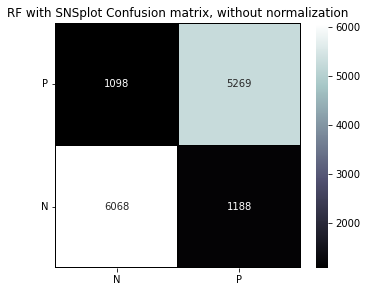

In [ ]:
sns_plot_cm(YL_test,rf.predict(XL_test),title='RF with SNSplot')

Figure 1: This is a confusion matrix of the randomforest model on the test data, created using seaborn which allowed me to annotate the figure with the numbers so it is easier to read. Here it is shown that True Positives (PP) of the test data is about 5218 data points and True Negatives (NN) is about 6077 data points. And both error types, false positive and false negatives are much lower at about 1100 to 1200 data points, meaning the randomforest model is doing pretty well.

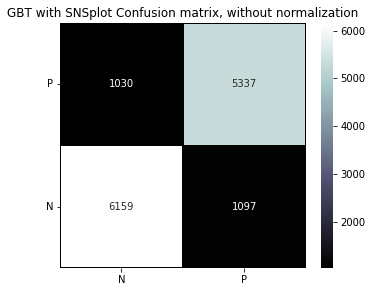

In [ ]:
sns_plot_cm(YL_test,gbt.predict(XL_test),title='GBT with SNSplot')

Figure 2: This is a confusion matrix of the gradientboostingtrees model on the test data, created using seaborn which allowed me to annotate the figure with the numbers so it is easier to read. Here it is shown that True Positives (PP) of the test data is about 5279 data points and True Negatives (NN) is about 6168 data points. And both error types, false positive and false negatives are much lower at about 1100 data points. In comparison to the randomforest confusion matrix, the gradientboostingtrees model is doing. slighly better

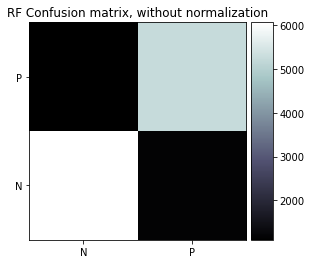

In [ ]:
plot_confusion_matrix(YL_test,rf.predict(XL_test),title='RF')

Figure 3: Same as figure 1 but created with Professor Bianco's code

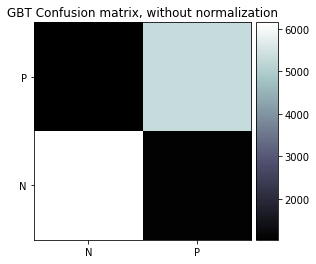

In [ ]:
plot_confusion_matrix(YL_test,gbt.predict(XL_test),title='GBT')

Figure 4: Same as figure 2 but created with Professor Bianco's code


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
traindata_weights, testdata_weights, train_weights, test_weights = train_test_split(higgsdata,weights,test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(traindata_weights,train_weights)

RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
rfR.score(traindata_weights,train_weights), rfR.score(testdata_weights,test_weights)

(0.29014148072993307, 0.27563173393131346)

In [ ]:
#quite low, and I am not sure what the implications of these are

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbtR = GradientBoostingRegressor(max_depth=3,random_state=0)
gbtR.fit(traindata_weights,train_weights)

GradientBoostingRegressor(random_state=0)

In [ ]:
gbtR.score(traindata_weights,train_weights), gbtR.score(testdata_weights,test_weights)

(0.4679361324942797, 0.431845141834421)

In [ ]:
#quite low, and I am not sure what the implications of these are. 
#However higher than the rfR scores

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
def L2(yTrue, yPred):
    return np.sum((yTrue-yPred)**2)

def L1(yTrue, yPred):
    #return np.sum(np.sqrt(((yTrue-yPred)**2)))
    return np.sum(np.absolute(yTrue-yPred))


print("L1 rfR:",L1(test_weights,rfR.predict(testdata_weights)))
print("L2 rfR:",L2(test_weights,rfR.predict(testdata_weights)))

print("L1 gbtR:",L1(test_weights,gbtR.predict(testdata_weights)))
print("L2 gbtR:",L2(test_weights,gbtR.predict(testdata_weights)))

L1 rfR: 5725.751388283275
L2 rfR: 5400.4212708249925
L1 gbtR: 4822.711246912968
L2 gbtR: 4235.795140242943


In both cases for L1 and L2, the gradientboosting regressor has a lower error than the randomforest regressor, this means that the gbtR model provides less error and is a more confident model than rfR.

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

    You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

    Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

 



Random Forest feature importance
DER_mass_MMC 0.35
DER_mass_vis 0.12
DER_prodeta_jet_jet 0.08
DER_mass_jet_jet 0.07


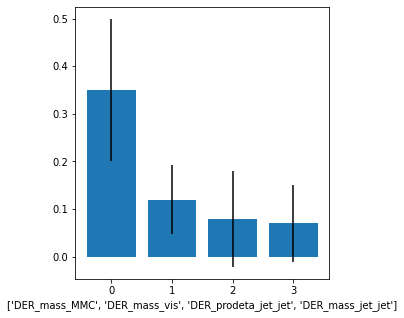

In [ ]:
print("Random Forest feature importance")
rfnameList = np.array([])
rfvalList = np.array([])

for f,fi in zip (higgsdata.columns, rf.feature_importances_):
    rfnameList = np.append(rfnameList,f)
    rfvalList = np.append(rfvalList,fi.round(2))

sortIndex = rfvalList.argsort()
sortIndex = sortIndex[::-1]
rfnameList = rfnameList[sortIndex]
rfvalList = rfvalList[sortIndex]

for i in range(4):
    print(rfnameList[i],rfvalList[i])

std = np.std([rf.feature_importances_ for rf in rf.estimators_],axis=0)
fig = pl.figure(figsize=(10,5))
ax = fig.add_subplot(121)
pl.bar(range(4), rfvalList[:4], yerr=std[sortIndex[:4]], align="center")
pl.xlabel(list(rfnameList[:4]));

From the feature importance, it shows that the mass feature is the most important in classifying the data. From the Kaggle Description: "The ATLAS experiment has recently observed a signal of the Higgs boson decaying into two tau particles, but this decay is a small signal buried in background noise." This makes some sense, if there is a relation between mass and decaying then meaning mass is most important in the classification of this data.

In [ ]:
pprint(random_grid)


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
higgsdata.iloc[:, best_features_index]

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation, 
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=1, cv=3, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
random_search.fit(...
                  

In [ ]:
print("Tuned RF  Parameters: {}".format(...))
print("Best score is {}".format(...))


In [ ]:
df = pd.DataFrame(random_search.cv_results_)


In [ ]:
df

# Extra Credit: Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it. 

In [ ]:
rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(testdata))

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
